In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

# EV Adoption Trend

In [2]:
#Loading EV sales by makers and category dataset
ev_sales = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
ev_sales.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [3]:
#Looking for missing values and irrelavant values
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [4]:
ev_sales.min(numeric_only = True)

2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64

In [5]:
ev_sales_by_year = ev_sales.sum(numeric_only = True)
ev_sales_by_year

2015       7752
2016      49249
2017      87019
2018     129763
2019     165786
2020     123770
2021     328854
2022    1020533
2023    1529234
2024     978943
dtype: int64

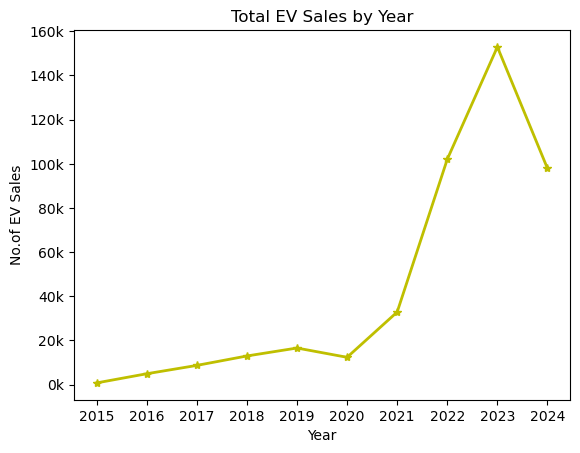

In [6]:
plt.plot(ev_sales_by_year, color = 'y', lw = 2, marker = '*') #plotting linear graph for ev sales per year

plt.xlabel('Year')
plt.ylabel('No.of EV Sales')
plt.title('Total EV Sales by Year')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 10000)}k')) #Formats y-axis scale as 1k, 2k, etc.

plt.savefig(r'C:\Users\cool\OneDrive\Desktop\Major Project\trends.png')
plt.show()

**Insights:**

* **Continuous Growth in EV Sales:** EV sales have shown a consistent increase year by year.
* **Dip in 2020:** There is a noticeable drop in EV sales in 2020, likely due to the COVID-19 pandemic impacting the economy and consumer spending.
* **Drastic Increase from 2021:** From 2021 onward, there is a dramatic rise in EV sales. This trend could be attributed to increased awareness about EVs, greater government incentives or support, and more people opting to buy vehicles after the pandemic.
* **2024 Sales Outlook:** The data for 2024 is up to August, so a full-year analysis isn’t possible. However, even with just two-thirds of the year completed, EV sales have reached 978,943, indicating strong growth and suggesting that 2024 might close with a record-breaking sales count.
* **Environmental Benefits:** The rapid increase in electric vehicle (EV) sales reduces the demand for fuel-powered vehicles. This shift leads to lower greenhouse gas emissions and decreased air pollution, contributing to improved air quality and helping to mitigate global warming. As more consumers opt for EVs, the overall environmental impact of transportation becomes more sustainable.

# Manufracturer Performance

In [7]:
ev_sales['Total Sales'] = ev_sales.iloc[:,2:-1].sum(axis = 1) #Total sales by maker by category from 2015 to 2024
ev_sales.sort_values('Total Sales', ascending = False, inplace = True)

ev_sales['Market Share'] = ev_sales['Total Sales'] * 100/ev_sales['Total Sales'].sum() #Finding maker's market share
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales,Market Share
867,2W,OLA ELECTRIC TECHNOLOGIES PVT LTD,0,0,0,0,0,0,240,109398,267355,211273,376993,10.952858
1230,2W,TVS MOTOR COMPANY LTD,165,171,69,23,30,233,5258,47182,166580,98516,219711,6.383311
472,2W,HERO ELECTRIC VEHICLES PVT. LTD,1,34,162,5785,11155,8247,46260,97828,29964,2211,199436,5.794257
864,2W,OKINAWA AUTOTECH PVT LTD,0,1,331,8452,11850,5754,30659,103620,31616,3893,192283,5.586439
118,2W,ATHER ENERGY PVT LTD,0,0,0,24,2291,3052,15930,51808,104735,58547,177840,5.166824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,3W,SHIV ENTERPRISES,0,0,0,0,0,0,0,0,0,72,0,0.000000
608,3W,KAKKAR ELECTRIC AUTO PVT LTD,0,0,0,0,0,0,0,0,0,93,0,0.000000
802,3W,MOMU AUTOMOTIVE,0,0,0,0,0,0,0,0,0,210,0,0.000000
370,2W,FSTMOTO INTERNATIONAL (IMPORTER: TEDI (INDIA)),0,0,0,0,0,0,0,0,0,2,0,0.000000


In [8]:
#Filtering top 10 makers by category on total ev sales till 2024
ev_sales.head(10)

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales,Market Share
867,2W,OLA ELECTRIC TECHNOLOGIES PVT LTD,0,0,0,0,0,0,240,109398,267355,211273,376993,10.952858
1230,2W,TVS MOTOR COMPANY LTD,165,171,69,23,30,233,5258,47182,166580,98516,219711,6.383311
472,2W,HERO ELECTRIC VEHICLES PVT. LTD,1,34,162,5785,11155,8247,46260,97828,29964,2211,199436,5.794257
864,2W,OKINAWA AUTOTECH PVT LTD,0,1,331,8452,11850,5754,30659,103620,31616,3893,192283,5.586439
118,2W,ATHER ENERGY PVT LTD,0,0,0,24,2291,3052,15930,51808,104735,58547,177840,5.166824
76,2W,AMPERE VEHICLES PRIVATE LIMITED,0,0,0,0,1196,4522,12470,79857,42903,857,140948,4.094992
1357,3W,YC ELECTRIC VEHICLE,1,1665,7434,10816,13213,9543,15793,29793,40794,23892,129052,3.749375
148,2W,BAJAJ AUTO LTD,161,78,43,7,7,1243,4633,25318,71940,73698,103430,3.004974
749,3W,MAHINDRA & MAHINDRA LIMITED,2,35,242,4150,6725,4564,3860,13558,37942,1331,71078,2.065044
1020,3W,SAERA ELECTRIC AUTO PVT LTD,140,1203,1532,3226,5080,4153,7098,19314,29321,16408,71067,2.064725


In [9]:
top_10_makers = ev_sales[['Maker', 'Total Sales']] #Creating a dataframe which has only Maker, and Total Sales columns
top_10_makers[['Maker','Total Sales']].groupby('Maker')
top_10_makers.sort_values('Total Sales', ascending = False)
top_10_makers = top_10_makers.head(10) #Taking only top 10 ev makers
top_10_makers

,Maker,Total Sales
867,OLA ELECTRIC TECHNOLOGIES PVT LTD,376993
1230,TVS MOTOR COMPANY LTD,219711
472,HERO ELECTRIC VEHICLES PVT. LTD,199436
864,OKINAWA AUTOTECH PVT LTD,192283
118,ATHER ENERGY PVT LTD,177840
76,AMPERE VEHICLES PRIVATE LIMITED,140948
1357,YC ELECTRIC VEHICLE,129052
148,BAJAJ AUTO LTD,103430
749,MAHINDRA & MAHINDRA LIMITED,71078
1020,SAERA ELECTRIC AUTO PVT LTD,71067


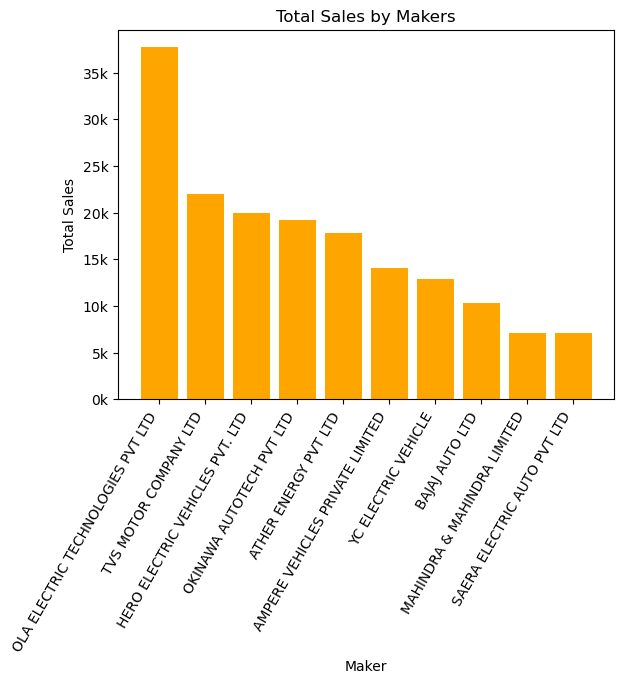

In [10]:
plt.bar(top_10_makers['Maker'], top_10_makers['Total Sales'], color = 'orange')
plt.xlabel('Maker')
plt.ylabel('Total Sales')
plt.title('Total Sales by Makers')
plt.xticks(rotation=60, ha = 'right') #Rotating X-axis values to avoid overlapping of names
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 10000)}k'))

plt.savefig(r'C:\Users\cool\OneDrive\Desktop\Major Project\top performer.png')

plt.show()

**Insights:**

* **Ola Electric's Success:** Ola Electric, even though it is new in the market, leads in sales likely due to its innovative features and affordable prices.
* **Trusted Brands:** Established brands like TVS and Bajaj have strong sales, likely due to the trust they've built over years.
* **Early EV Adopters:** Ather Energy and Hero Electric perform well likely because they entered the EV market early and gained recognition.
* **Competitive Innovation:** Each brand needs to keep innovating to stand out and attract more customers in this growing market.


# EV Categorical Analysis

In [11]:
#Loading EV category dataset
ev_cat = pd.read_csv('ev_cat_01-24.csv')

In [12]:
ev_cat_sales = ev_cat.sum(numeric_only = True) #Getting total sales by eah category of EV
ev_cat_sales

FOUR WHEELER (INVALID CARRIAGE)         97
HEAVY GOODS VEHICLE                    614
HEAVY MOTOR VEHICLE                    146
HEAVY PASSENGER VEHICLE               8131
LIGHT GOODS VEHICLE                  12725
LIGHT MOTOR VEHICLE                 180330
LIGHT PASSENGER VEHICLE              22807
MEDIUM GOODS VEHICLE                    31
MEDIUM PASSENGER VEHICLE               776
MEDIUM MOTOR VEHICLE                    49
OTHER THAN MENTIONED ABOVE            7589
THREE WHEELER(NT)                     1498
TWO WHEELER (INVALID CARRIAGE)         126
THREE WHEELER(T)                   1932683
TWO WHEELER(NT)                    2308887
TWO WHEELER(T)                       13459
dtype: int64

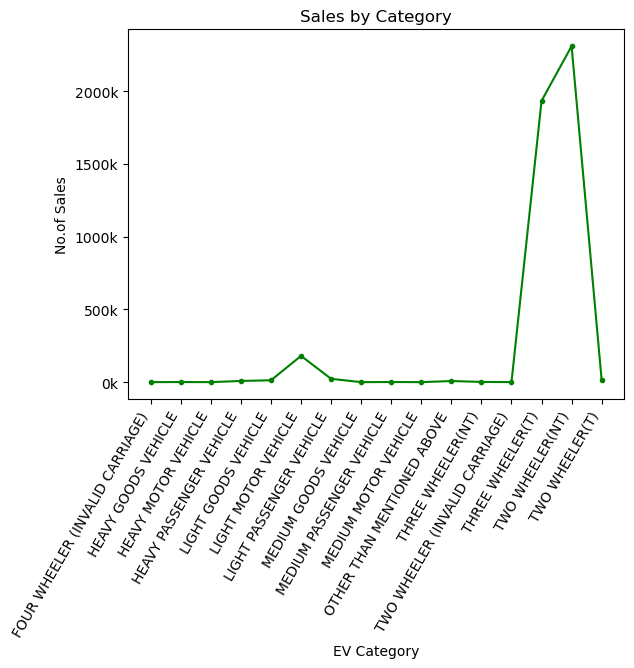

In [13]:
plt.plot(ev_cat_sales, color = 'g', marker = '.')
plt.xlabel('EV Category')
plt.ylabel('No.of Sales')
plt.title('Sales by Category')

plt.xticks(rotation = 60, ha = 'right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))

plt.savefig(r'C:\Users\cool\OneDrive\Desktop\Major Project\vehicle popularity.png')
plt.show()

**Insights:**

* **Dominance of Two-Wheelers:** The majority of EV sales come from the "Two Wheeler (NT)" category, indicating that non-transport two-wheelers are the most popular EV type among consumers. This could be due to affordability, ease of use, and convenience for short-distance travel.
* **High Sales in Three-Wheelers (Transport):** Three-wheelers(T) also have a significant share, which may suggest that they are a popular choice for commercial and transport purposes, possibly due to government incentives for sustainable public transportation.
* **Heavy Vehicles Have Lower Sales:** Sales of heavy vehicles, such as "Heavy Goods Vehicle" and "Heavy Motor Vehicle," are relatively low, possibly due to the higher initial cost of electric heavy vehicles and limited charging infrastructure.

# Geographical Analysis

In [14]:
#Loading EV Maker by Place and Operational Public Charging Stations dataset
ev_maker = pd.read_csv('EV Maker by Place.csv')
op_pcs = pd.read_csv('OperationalPC.csv')

In [15]:
ev_maker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [16]:
op_pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


In [17]:
#counting no.of ev manufacturing plants that are located in each state
plant_count_by_state = ev_maker[['State','EV Maker']].groupby('State').count()
plant_count_by_state = plant_count_by_state.sort_values(by = 'EV Maker', ascending = False)
top_5_states = plant_count_by_state.head()
top_5_states

,EV Maker
State,
Maharashtra,15
Tamil Nadu,11
Haryana,6
Karnataka,6
Gujarat,5


In [18]:
#Top 5 states with highest no.of pcs installed
op_pcs = op_pcs.sort_values('No. of Operational PCS', ascending = False)
top_states = op_pcs.head()
top_states

,State,No. of Operational PCS
19,Maharashtra,3079
8,Delhi,1886
15,Karnataka,1041
16,Kerala,852
28,Tamil Nadu,643


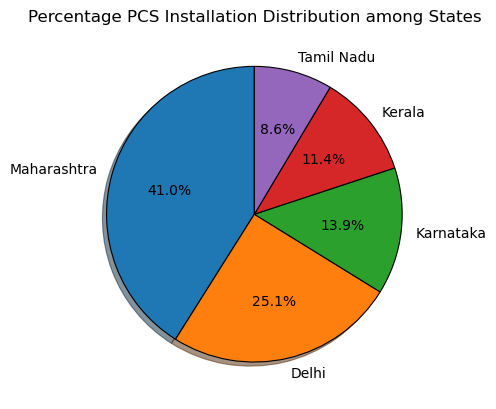

In [19]:
plt.pie(top_states['No. of Operational PCS'], labels = top_states['State'], autopct = '%1.1f%%',
       wedgeprops = {'edgecolor':'black', 'linewidth':0.8}, shadow = True, startangle = 90)

plt.title('Percentage PCS Installation Distribution among States')
plt.savefig(r'C:\Users\cool\OneDrive\Desktop\Major Project\highest pcs installations.png')
plt.show()

**Insights:**

* **EV Manufacturing Hubs:** Maharashtra and Tamil Nadu are the top states for EV manufacturing, with 15 and 11 plants respectively. This indicates that these regions are leading the way in producing electric vehicles, likely due to supportive policies and investment.
* **Variety in Locations:** States like Haryana, Karnataka, and Gujarat also contribute to EV manufacturing, with 6 and 5 plants respectively. This diversity shows that multiple regions are involved in the EV market, which can help spread economic benefits and innovation.
* **Charging Infrastructure:** Maharashtra stands out with 3,079 operational charging stations, making it easier for EV owners to find places to charge their vehicles. Delhi follows with a significant number as well, highlighting a strong focus on developing charging networks in urban areas.

* **Infrastructure Needs:** In contrast, Karnataka and Kerala have fewer charging stations compared to the number of manufacturing plants. This gap suggests that these states need to enhance their charging infrastructure to effectively support the growing EV production and usage.

# Indian Government Impact on Indian EV Market

**Insights:**

* **Incentives and Subsidies:** The government has implemented financial incentives, such as the FAME (Faster Adoption and Manufacturing of Electric Vehicles) scheme, which provides subsidies for EV purchases. This reduces the upfront cost for consumers and encourages adoption.
* **Tax Benefits:** Tax exemptions and reductions, including lower GST rates for EVs, have made electric vehicles more affordable for consumers and businesses, promoting greater market uptake.
* **Manufacturing Support:** Initiatives like the Production-Linked Incentive (PLI) scheme aim to boost domestic EV manufacturing. This encourages local production of EV components, reduces dependency on imports, and creates jobs.
* **Charging Infrastructure Development:** The government has focused on expanding the EV charging network through public-private partnerships and investments. This alleviates range anxiety for consumers and makes EV ownership more viable.
* **State Policies:** Many Indian states have introduced their own EV policies, offering additional incentives like road tax exemptions and rebates, further enhancing the attractiveness of electric vehicles.
* **Awareness Campaigns:** The government has launched awareness programs to educate the public about the benefits of EVs, promoting a shift in consumer perception and encouraging adoption.
* **Sustainability Goals:** The government's commitment to reducing carbon emissions as part of international climate agreements has driven a push towards EVs as a key component of a sustainable transportation strategy.